## Segmentation and Image Analysis

This problem set mostly arranged like a "mini" project with various steps which build on each other. I highly recommend you start early in order to not get stuck on part 1(a)at the last minute!


Homework Guidelines:

1) Document your code! Only part of your score on the homework will be if you get the "right" answer. In order for us to understand what you've written, you need to have clearly written code. Documenting your code with comments (# sign) and spacing out your code (but not too much) makes it easier to read. You should also make use of the markdown feature of ipython notebooks for longer explanations or to imbed pictures/formulas.

2) You may google around for tools for solving the homework problems (StackExchange will often pop up!) but DO NOT google the exact problem statement or copy blocks of code from elsewhere.

3) You can work in small groups to complete assignments and share code within the small group. Please specify who you worked with if your submitted solutions are similar/identical.

4) Various python packages have built in routines for common programming tasks. If you want to use an external (i.e. import X) package which isn't imported in the problem statement please ask the instructor first.

5) Some problem statements might be vague or unspecific (like "Explore the relationship between X and Y"), just like real research questions! When in doubt it would be useful to provide plots and your observations. Show what you did graphically whenever possible.

6) Run all cells before you commit!


<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

## 1) Dissecting the Image (15 points)

In this folder is a file, "hudf.png", which has a large file of the Hubble "Ultra Deep Field". This small patch of the sky was choosen since it had few galactic stars in the way. To learn more about the field, read the [wikipedia article](https://en.wikipedia.org/wiki/Hubble_Ultra-Deep_Field).

The goal of this assignment is to make a rudimentary "source extractor" (known as a SExtractor in the astronomy) which will identify each source uniquely and save its quantities for later analysis.

Populating the interactive namespace from numpy and matplotlib


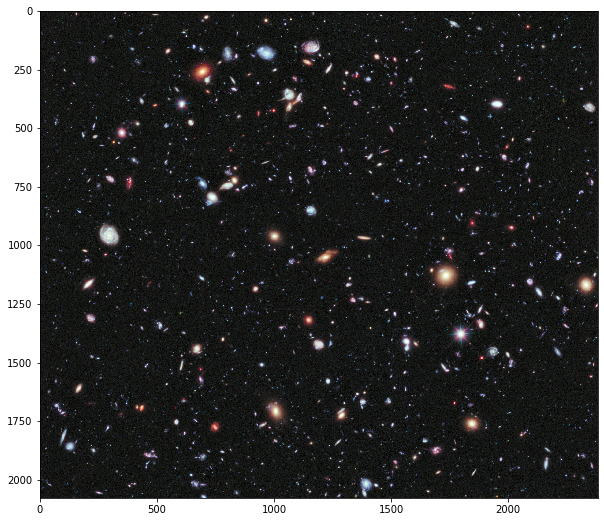

In [3]:
%pylab inline

import matplotlib.image as mpimg
plt.figure(figsize=(10,10))

img = mpimg.imread("/Users/benjaminhorowitz/hudf.png") 
imshow(img)

a) Sadly there is still (at least) one star in the image (identifiable by the diffraction lines located horizontally and diagonally), located around $x \approx 1800$ and $y \approx 1400$. Manually identify it and remove it from the image via a suitably small mask (i.e. zero out the values at/around the star). Show a picture of the area before and after.

b) Notice that there is a low level of noise across the image. Make a new, low-noise, version of the image through the following steps:

1) Apply a Gaussian Filter with suitable smoothing scale.

2) Make a mask of all pixels with values below a certian threshold value in all color bins (you might find np.logical_and helpful).

3) Display again the original image multiplied by the mask.

c) Use the ndimage.label command to segment the image. Display the numpy array that this command generates.

## 2) Blended Sources (20 points)

You might have already noticed that, depending on your smoothing scale and your thresh-hold value, you have sources which are "blended", i.e. multiple galaxies which are close enough on the sky to be considered one source by your segmentation. In this section we will try to identify these blended sources.

See here for an example from my run:

![Classic Blended](./blended.png)

a) Write a function which will take in a mask and an image which will output a smaller "postage stamp" of just the galaxy as in the above image with the identified source outlined. (You might find the ndimage.center_of_mass command very helpful)

b) Loop over the 40 largest (by number of pixels) sources found in (1c) and use your function from (2a) to display the sources. Visually identify a few of the most pronounced blended sources. 

If you find all your largest sources are blended, you might want to increase the threshhold or decrease the smoothing scale from Part 1. If you don't see any blended sources, do the opposite.

c) "Color" in astronomical terms is defined as the differences between the pixel values in each band (in this case R,G, and B). For one blended source (choose the nicest looking), calculate the colors of all pixels (i.e. [R-B, R-G, G-B]) and plot two colors of two colors vs. each other. This is known as plotting things in color-color space.

You should find that there are two distinct blobs, possibly more! 

Note, you might want to normalize the bands (R,G,B) first using the following routine...

In [ ]:
#pixels is a [N,3] array of the pixel band information
for i in range(0,3):
    print(pixels[:,i].std(),pixels[:,i].mean())
    pixels[:,i] += -1*pixels[:,i].mean() #subtracting the mean
    pixels[:,i] *= 1/pixels[:,i].std() #normalizing the resulting band
    print(pixels[:,i].std(),pixels[:,i].mean())


d) Design a procedure to identify these blended sources. Possibilities include:

1) Use some property of the color-color diagram to identify likely blended sources.

2) Changing the threshold value and reapplying the segmentation algorithm to that particular patch and see if two distinct sub-segmenents emerge.

3) Use some geometric property of the boundary to identify likely blended sources.

4) Something new and exciting!

(It doesn't have to be perfect, but something that gets them more often than not ;) )

e) Apply this algorithm to the 40 sources found in part (2b). Does it seem to properly identify blended sources?

f) Apply to all your sources. How many of them are blended according to your algorithm?

# 3) Wine dataset (10 points)

Lets try to classify wines based on a few of their characteristics...

In [2]:
from sklearn import datasets

wine = datasets.load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

1) Perform a PCA analysis with two components. Plot the result, coloring each point by it's class designation.

2) Now, lets standardize the datapoints using the same procedure in question 2 part c, i.e.

$x_{\textrm i, new} = \frac{x_i-x_{\textrm mean}}{x_{\textrm standard\ deviation}}$,

and perform again the PCA analysis. How does the seperation compare?

3) Perform a kmeans analysis in the standardized and unstandardized PCA transformed space. How do the results compare?

## 4) Final Project Progress Summary (5 Points)

Please briefly describe your progress so far this week on your final project! Remember it is due on Friday, 8/16/2019.